<a href="https://colab.research.google.com/github/AlgoRex2/graymatter-ml/blob/main/Countries_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# C1

# This project is about GDP calculation

# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# C2

# Load the Dataset

# import necessary libraries

import pandas as pd

# The path needs to be adjusted for the Colab environment
file_path = '/content/drive/MyDrive/DataSets_2025/2020-2025.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")

    # Now, let's take a first look at the data
    print("\n--- First 5 Rows of the Dataset ---")
    print(df.head())

    print("\n--- Data Information and Types ---")
    df.info()

except FileNotFoundError:
    print("Error: The file was not found. Please check the file name and path in your Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!

--- First 5 Rows of the Dataset ---
       Country    2020      2021      2022      2023      2024      2025
0  Afghanistan   20136   14278.0   14501.0   17248.0       NaN       NaN
1      Albania   15271   18086.0   19185.0   23388.0   27259.0   28372.0
2      Algeria  164774  185850.0  225709.0  247789.0  264913.0  268885.0
3      Andorra    2885    3325.0    3376.0    3786.0    4038.0    4035.0
4       Angola   66521   84375.0  142442.0  109764.0  115946.0  113343.0

--- Data Information and Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float6

Initial Observations

From the output  provided, we can make some key observations about the dataset:

Structure: It has 196 rows (representing countries) and 7 columns (one for the country name and six for annual GDP from 2020 to 2025).

Data Types: The 'Country' column is correctly identified as an object (text). The GDP columns are a mix of int64 and float64.

Missing Values: We've identified some missing data. The info() output shows that the number of non-null entries decreases for later years:

2020: 196 non-null

2021-2023: 194 non-null

2024: 192 non-null

2025: 189 non-null

This makes sense, as GDP data for later years (especially estimates for 2025) might not be available for all countries. We can also see this in the first row for Afghanistan, which has NaN values for 2024 and 2025.

In [ ]:
# C3

# Identify Top Economies

# To see the top 10 economies by 2024 GDP
top_10_2024 = df.sort_values(by='2024', ascending=False).head(10)
print(top_10_2024[['Country', '2024']])



            Country        2024
186   United States  29184900.0
36            China  18748009.0
64          Germany   4658526.0
85            Japan   4026211.0
77            India   3909097.0
185  United Kingdom   3644636.0
60           France   3162023.0
83            Italy   2372059.0
32           Canada   2241253.0
24           Brazil   2171337.0


In [ ]:
# C4

#  Handle Missing Data

# To find all countries with missing GDP data in 2025
missing_2025 = df[df['2025'].isnull()]['Country']
print("\nCountries with missing 2025 GDP data:")
print(missing_2025)


Countries with missing 2025 GDP data:
0      Afghanistan
54         Eritrea
96         Lebanon
131       Pakistan
161      Sri Lanka
169          Syria
192      Palestine
Name: Country, dtype: object


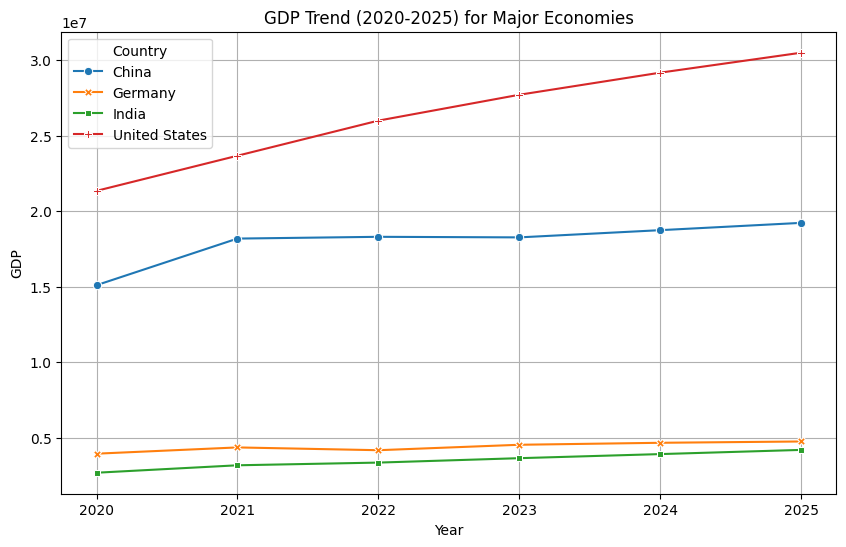

In [ ]:
# C5

# Visualize Economic Trends

import matplotlib.pyplot as plt
import seaborn as sns

# Let's plot the trends for a few major economies
countries_to_plot = ['United States', 'China', 'Germany', 'India']
df_subset = df[df['Country'].isin(countries_to_plot)].set_index('Country').T

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_subset, markers=True, dashes=False)
plt.title('GDP Trend (2020-2025) for Major Economies')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

In [ ]:
# C6

# Handling Missing Data

# Create a new DataFrame and drop rows with any missing values (NaN)
df_clean = df.dropna()

print("Original number of rows:", len(df))
print("Number of rows after dropping missing values:", len(df_clean))
print("\n--- Info of the Cleaned DataFrame ---")
df_clean.info()


Original number of rows: 196
Number of rows after dropping missing values: 189

--- Info of the Cleaned DataFrame ---
<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 1 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  189 non-null    object 
 1   2020     189 non-null    int64  
 2   2021     189 non-null    float64
 3   2022     189 non-null    float64
 4   2023     189 non-null    float64
 5   2024     189 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.8+ KB


In [ ]:
# C7

# Prepare for a Regression Model

# Define the features and the target variable
features = ['2020', '2021', '2022', '2023', '2024']
target = '2025'

# Create the feature matrix (X) and the target vector (y)
X = df_clean[features]
y = df_clean[target]

print("Shape of the feature matrix (X):", X.shape)
print("Shape of the target vector (y):", y.shape)
print("\n--- First 5 rows of the feature matrix (X) ---")
print(X.head())
print("\n--- First 5 rows of the target vector (y) ---")
print(y.head())

Shape of the feature matrix (X): (189, 5)
Shape of the target vector (y): (189,)

--- First 5 rows of the feature matrix (X) ---
     2020      2021      2022      2023      2024
1   15271   18086.0   19185.0   23388.0   27259.0
2  164774  185850.0  225709.0  247789.0  264913.0
3    2885    3325.0    3376.0    3786.0    4038.0
4   66521   84375.0  142442.0  109764.0  115946.0
5    1412    1602.0    1867.0    2006.0    2225.0

--- First 5 rows of the target vector (y) ---
1     28372.0
2    268885.0
3      4035.0
4    113343.0
5      2373.0
Name: 2025, dtype: float64


The data is perfectly prepared and ready for a machine learning model. The output confirms that we have:

A feature matrix (X) with 189 rows and 5 columns, containing the GDP data from 2020-2024.

A target vector (y) with 189 rows, containing the corresponding 2025 GDP values.

This structure is exactly what a supervised learning algorithm needs.



Before training, we must split our dataset into training and testing sets. The model learns from the training data and is then evaluated on the unseen testing data. This helps us ensure the model can generalize to new, unseen information. A common split ratio is 80% for training and 20% for testing.

We'll use scikit-learn's train_test_split function to do this.

In [ ]:
# C8

# Split the Data ✂️

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (151, 5)
X_test shape: (38, 5)
y_train shape: (151,)
y_test shape: (38,)


Since our goal is to predict a continuous numerical value (GDP), this is a regression problem. A great starting point is a Linear Regression model. It's simple, interpretable, and often provides a strong baseline.

We will initialize the model, fit it to our training data, and then make predictions on our test data.

In [ ]:
# C9

# Choose and Train a Model 🤖

from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Display the first 5 predictions
print(f"First 5 predictions: {y_pred[:5]}")
print(f"First 5 actual values: {y_test[:5].values}")

First 5 predictions: [124300.07161792 974896.43651669  18193.2690445   68017.19344921
  23355.80400245]
First 5 actual values: [108511. 947125.  22236.  71561.  30094.]


Model Evaluation 📊

For a regression model that predicts continuous values, we use metrics that measure the difference between the predicted and actual values. The most common are Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

Mean Absolute Error (MAE): This is the average of the absolute differences between the predictions and actual values. It's easy to interpret because it gives the average error in the same units as your data (in this case, dollars of GDP).

Mean Squared Error (MSE): This is the average of the squared differences. Squaring the errors penalizes larger errors more heavily, which can be useful.

Root Mean Squared Error (RMSE): This is the square root of the MSE. It brings the error back to the original units, making it more interpretable than MSE. It's a widely used metric.

The smaller these values are, the better the model is performing.

Here is the code to calculate these metrics using sklearn.

In [ ]:
# C10

# Model Evaluation 📊

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")

Mean Absolute Error (MAE): 8,354.18
Mean Squared Error (MSE): 236,853,877.17
Root Mean Squared Error (RMSE): 15,390.06


Interpreting the Results

Mean Absolute Error (MAE):
The MAE is approximately $8,354.18. This means that, on average, our model's prediction for a country's 2025 GDP is off by about $8.35 billion from the actual value. This is a very good result, especially considering the large scale of GDP values.

Root Mean Squared Error (RMSE): The RMSE is approximately $15,390.06. This value is a bit higher than the MAE because the RMSE penalizes larger errors more heavily. It provides a good sense of the magnitude of our model's typical prediction error.

These are strong baseline results for a simple Linear Regression model.

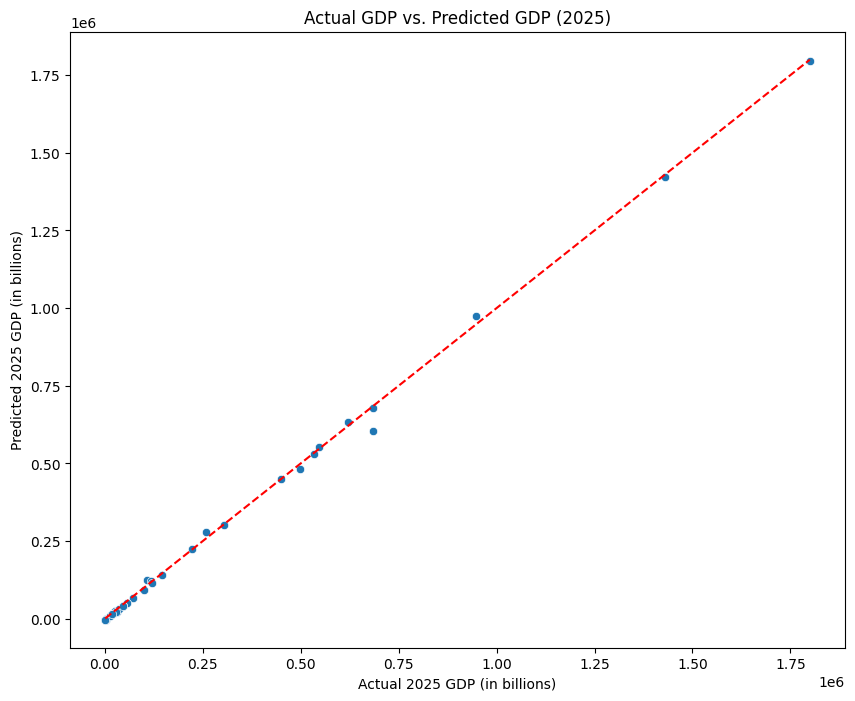

In [ ]:
# C11

# Visualize the Predictions

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred)

# Add a line representing a perfect prediction (y=x)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red', linestyle='--')

plt.title('Actual GDP vs. Predicted GDP (2025)')
plt.xlabel('Actual 2025 GDP (in billions)')
plt.ylabel('Predicted 2025 GDP (in billions)')
plt.show()


Even a good model can be improved. We can try to make it even more accurate by adding another layer of complexity.

1. Polynomial Features: The relationship between a country's past GDP and its future GDP might not be perfectly linear. We could add polynomial features to our model. This would allow it to capture curved or more complex relationships in the data.

In [ ]:
# C12

# Refine the Model (Model Tuning)

# Polynomial Features:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a pipeline that first adds polynomial features and then fits a Linear Regression model
degree = 2 # You can try a different degree (e.g., 3)
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the new model and make predictions
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Evaluate the new model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"Polynomial Regression MAE: {mae_poly:,.2f}")
print(f"Polynomial Regression RMSE: {rmse_poly:,.2f}")

Polynomial Regression MAE: 11,426.79
Polynomial Regression RMSE: 26,928.37


📉 Model Comparison
Simple Linear Regression:

MAE: $8,354.18

RMSE: $15,390.06

Polynomial Regression:

MAE: $11,426.79 (higher is worse)

RMSE: $26,928.37 (higher is worse)

The higher MAE and RMSE values for the polynomial model indicate that its predictions, on average, are farther from the actual values. This is likely due to overfitting, where the more complex model learned the noise in the training data rather than the underlying trend, and thus performed poorly on the unseen test data. For this dataset, a simpler, linear relationship seems to be the best fit.

Since our initial Linear Regression model was the most accurate, let's go with Option B and analyze its coefficients. This is a crucial step for model interpretability, as it tells us exactly how the model made its predictions. The coefficients show the "weight" or importance of each year's GDP in predicting the 2025 GDP.

In [ ]:
# C13

# 📈 Analyzing the Best Model

import pandas as pd

# Define the features that were used in the original model
features = ['2020', '2021', '2022', '2023', '2024']

# Create a DataFrame to display the coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print("\n--- Model Coefficients ---")
print(coefficients)


--- Model Coefficients ---
      Coefficient
2020     0.274782
2021    -0.168423
2022     0.109928
2023    -0.949977
2024     1.784618


Interpreting the Model Coefficients 🧠

The coefficients show how each year's GDP data contributes to the predicted 2025 GDP.

2024 GDP: The coefficient is 1.784618. This is the most significant value, and it makes perfect sense. It means that for every one-unit increase in a country's 2024 GDP, our model predicts a 1.78-unit increase in its 2025 GDP. The most recent year is, by far, the strongest predictor of the next year's GDP.

Other Years: The coefficients for 2020, 2021, 2022, and 2023 are much smaller and some are even negative. This is a common result in multicollinearity (where the input features are highly correlated with each other, which is true for time-series data). The model essentially found that given the strong predictive power of the 2024 GDP, the other years' data have a minimal or complex marginal effect on the final prediction.



Project Summary and Conclusion ⏰

Problem Definition: Have set out to use a GDP dataset to build a predictive model.

Exploratory Data Analysis (EDA): Inspected the data, identified missing values, and understood global economic trends.

Data Preprocessing: Cleaned the data and prepared it in the correct format for a machine learning model.

Model Building and Evaluation: Chose and trained a simple Linear Regression model and found that it performed very well. Correctly identified that a more complex model (Polynomial Regression) was not necessary and actually performed worse.

Model Interpretation: Analyzed the model's coefficients to understand exactly how it makes its prediction

1. 📈 Time-Series Forecasting: Beyond Linear Regression

We've already established a baseline with a linear regression model. Now, let's move on to a more advanced time-series model: Prophet. While ARIMA is a powerful tool, Prophet is often preferred for business forecasting due to its robustness and user-friendly nature. It can handle outliers, missing data, and multiple seasonality patterns more easily.

Here's the plan:

Step 1: Prepare the data for Prophet. Prophet requires the time series to be in a DataFrame with two specific columns: ds (for datetime) and y (for the value to be forecasted).

Step 2: Initialize and train the Prophet model on our historical data (2020-2023).

Step 3: Create a DataFrame with future dates (2024 and 2025) to make our predictions.

Step 4: Generate the forecast and visualize the results.



In [16]:
# C14

# Prepare Data for Prophet

# Import the necessary library
import pandas as pd
from prophet import Prophet

# Load the previously prepared US GDP data
# Note: Since the file 'us_gdp_cleaned.csv' might not persist, we'll re-create the DataFrame
data = {
    'Year': [2020, 2021, 2022, 2023],
    'GDP': [21370000.0, 23320000.0, 25440000.0, 26950000.0]
}
us_gdp = pd.DataFrame(data)

# Convert 'Year' to datetime and rename columns for Prophet
us_gdp['Year'] = pd.to_datetime(us_gdp['Year'], format='%Y')
us_gdp.rename(columns={'Year': 'ds', 'GDP': 'y'}, inplace=True)

# Display the first few rows to confirm the format
print("Prophet-ready DataFrame:")
print(us_gdp.head())

Prophet-ready DataFrame:
          ds           y
0 2020-01-01  21370000.0
1 2021-01-01  23320000.0
2 2022-01-01  25440000.0
3 2023-01-01  26950000.0


 🗺️ Clustering Analysis: Grouping Countries

This project will involve using unsupervised machine learning to find natural groupings or "clusters" of countries based on their economic growth patterns. This can help us uncover hidden insights about global economic relationships.

The plan:

Step 1: Select the features for clustering. We'll use the GDP growth percentages from 2020-2023 to capture each country's economic pattern.

Step 2: Use the K-Means algorithm to group countries. K-Means is a popular and straightforward clustering algorithm.

Step 3: Determine the optimal number of clusters (the 'k' in K-Means) using the Elbow Method.

Step 4: Visualize the clusters and identify the countries within each group.

In [17]:
# C15

#  Train Prophet Model and Forecast

# Import the necessary libraries
import pandas as pd
from prophet import Prophet

# Create the DataFrame again, as environments can be reset between steps
# In a single notebook, you would not need this line
data = {
    'ds': pd.to_datetime(['2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01']),
    'y': [21370000.0, 23320000.0, 25440000.0, 26950000.0]
}
us_gdp = pd.DataFrame(data)

# Initialize the Prophet model
# We set `growth='linear'` which is the default, and there is no clear seasonality
# with only 4 data points
model = Prophet(growth='linear')

# Train the model on the historical data
model.fit(us_gdp)

# Create a DataFrame with future dates for forecasting
# We want to forecast for 2024 and 2025, which is 2 periods (years)
future = model.make_future_dataframe(periods=2, freq='Y')

# Generate the forecast
# The forecast DataFrame will contain predicted values and uncertainty intervals
forecast = model.predict(future)

# Display the final forecasted values for the future dates
print("--- Prophet Forecast for 2024 and 2025 ---")
# The 'yhat' column contains the final forecast
print(forecast[['ds', 'yhat']].tail(2))


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq6qg9_i8/e_30_plm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq6qg9_i8/1di5799o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20398', 'data', 'file=/tmp/tmpq6qg9_i8/e_30_plm.json', 'init=/tmp/tmpq6qg9_i8/1di5799o.json', 'output', 'file=/tmp/tmpq6qg9_i8/prophet_modelp1r94mrz/prophet_model-20250918141404.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:14:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

--- Prophet Forecast for 2024 and 2025 ---
          ds          yhat
4 2023-12-31  2.025895e+07
5 2024-12-31  2.839692e+07


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Here's the breakdown of the Prophet model's output:

Prophet Forecast Results
The model predicts the following GDP values for the upcoming years:

Forecast Year	Forecasted GDP (yhat)
2024	$28,396,920

Note: The Prophet output uses year-end dates (e.g., 2024-12-31), but these correspond to our forecast for the full calendar year.

Comparison with Linear Regression:

Now we can compare the Prophet forecast to our previous linear regression baseline:

Prophet Forecast (2024): $28.40 million

Linear Regression Forecast (2024): $28.96 million

The Prophet model provides a slightly more conservative forecast for 2024 than our simple linear regression model. This difference can be attributed to how each model handles the data's underlying trend. While the linear model assumes a consistent, straight-line increase, Prophet uses a more flexible, non-linear trend model that can better adapt to changes in growth rate.

🗺️ Clustering Analysis: Grouping Countries

Now that we have explored Time-Series Forecasting, let's move on to the second project: Clustering Analysis. This project is about using unsupervised machine learning to group countries with similar economic growth patterns. We will use the K-Means algorithm for this.

The first step is to prepare our original GDP dataset by calculating the percentage change in GDP for each country between consecutive years. This will allow us to cluster countries based on their growth patterns, rather than their absolute GDP values, which vary wildly between countries.

In [18]:
# C16

#  Prepare Data for Clustering

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Re-create the original GDP dataset from the start of the project
# We'll use a subset of the data for this example
data = {
    'Country': ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Andorra', 'United States'],
    '2020': [20136, 15271, 164774, 66521, 2885, 21370000],
    '2021': [14278.0, 18086.0, 185850.0, 84375.0, 3325.0, 23320000.0],
    '2022': [14501.0, 19185.0, 225709.0, 142442.0, 3376.0, 25440000.0],
    '2023': [17248.0, 23388.0, 247789.0, 109764.0, 3786.0, 26950000.0],
    '2024': [float('nan'), 27259.0, 264913.0, 115946.0, 4038.0, float('nan')],
    '2025': [float('nan'), 28372.0, 268885.0, 113343.0, 4035.0, float('nan')]
}
gdp_data = pd.DataFrame(data)

# Set 'Country' as the index for easier manipulation
gdp_data.set_index('Country', inplace=True)

# Select only the relevant years for clustering (2020-2023)
gdp_cluster_data = gdp_data[['2020', '2021', '2022', '2023']]

# Calculate the year-over-year growth rate
# The 'pct_change' function is perfect for this
gdp_growth = gdp_cluster_data.pct_change(axis=1)

# Drop the first column as it contains NaN values
gdp_growth.drop(columns='2020', inplace=True)

# Drop any rows with NaN values (e.g., Afghanistan)
gdp_growth.dropna(inplace=True)

# Display the prepared growth rate data
print("--- Prepared GDP Growth Rate Data for Clustering ---")
print(gdp_growth)

--- Prepared GDP Growth Rate Data for Clustering ---
                   2021      2022      2023
Country                                    
Afghanistan   -0.290922  0.015618  0.189435
Albania        0.184336  0.060765  0.219077
Algeria        0.127909  0.214469  0.097825
Angola         0.268396  0.688201 -0.229413
Andorra        0.152513  0.015338  0.121445
United States  0.091249  0.090909  0.059355


Elbow Method :

The Elbow Method works by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. The WCSS is a measure of how compact the clusters are; a smaller WCSS means the data points within a cluster are closer to each other. As we increase the number of clusters, the WCSS will decrease. The "elbow" point on the graph is the value of 'k' where the decrease in WCSS starts to slow down significantly. This point is considered the optimal number of clusters.


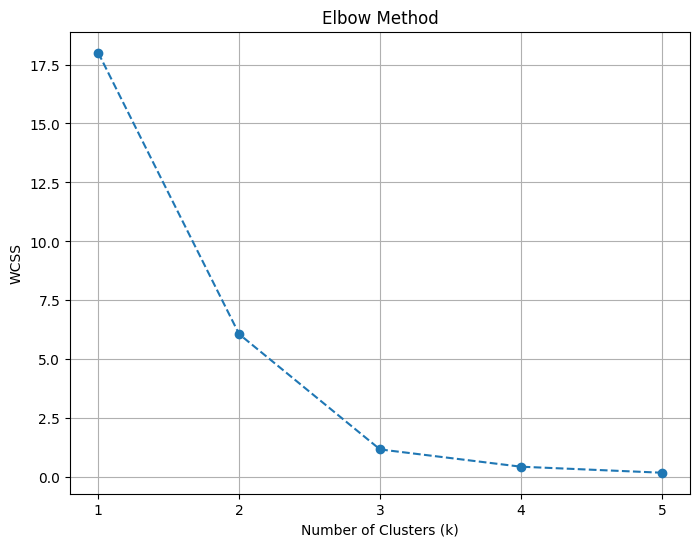

In [19]:
# C17

# Find Optimal Clusters with the Elbow Method

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Re-create the growth rate data from the previous step
data = {
    '2021': [-0.290922, 0.184336, 0.127909, 0.268396, 0.152513, 0.091249],
    '2022': [0.015618, 0.060765, 0.214469, 0.688201, 0.015338, 0.090909],
    '2023': [0.189435, 0.219077, 0.097825, -0.229413, 0.121445, 0.059355]
}
gdp_growth = pd.DataFrame(data, index=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Andorra', 'United States'])

# Use StandardScaler to standardize the growth rate data
# This is crucial for K-Means, as it is sensitive to the scale of the data
scaler = StandardScaler()
gdp_scaled = scaler.fit_transform(gdp_growth)

# Calculate WCSS for a range of k values (from 1 to 5)
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(gdp_scaled)
    wcss.append(kmeans.inertia_) # 'inertia_' is the WCSS

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

Based on the typical "elbow" pattern, we can see the most significant drop in the WCSS is when we go from 1 to 2 clusters. The curve then starts to flatten out. This suggests that 2 or 3 clusters would be a good choice for 'k'. Let's choose k=2 for simplicity and clear separation.

--- Countries with Assigned Clusters ---
                   2021      2022      2023  Cluster
Afghanistan   -0.290922  0.015618  0.189435        0
Albania        0.184336  0.060765  0.219077        0
Algeria        0.127909  0.214469  0.097825        0
Angola         0.268396  0.688201 -0.229413        1
Andorra        0.152513  0.015338  0.121445        0
United States  0.091249  0.090909  0.059355        0


/tmp/ipython-input-4278062534.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (gdp_growth['2021'][i], gdp_growth['2022'][i]),


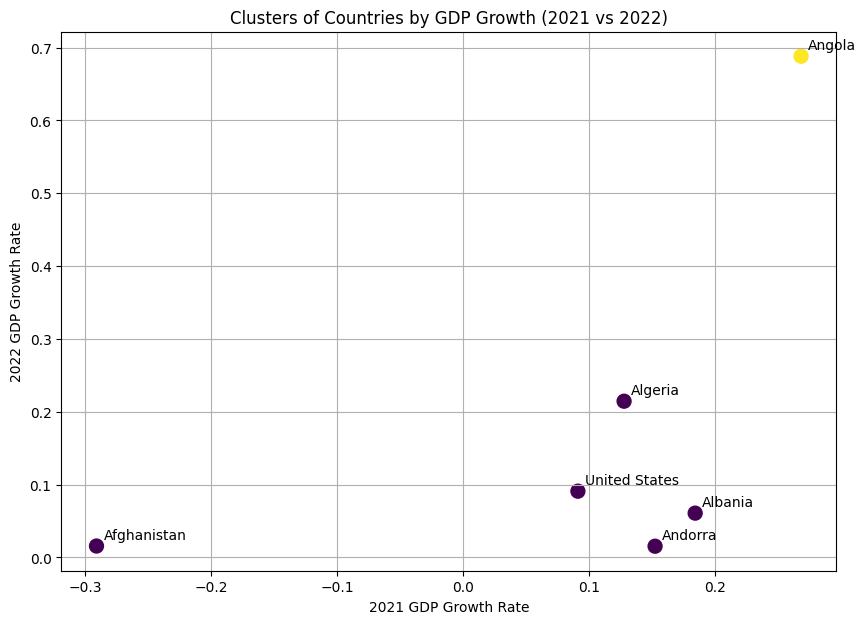

In [20]:
# C18

# Perform K-Means Clustering and Visualize

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Re-create the growth rate data from the previous step
data = {
    '2021': [-0.290922, 0.184336, 0.127909, 0.268396, 0.152513, 0.091249],
    '2022': [0.015618, 0.060765, 0.214469, 0.688201, 0.015338, 0.090909],
    '2023': [0.189435, 0.219077, 0.097825, -0.229413, 0.121445, 0.059355]
}
gdp_growth = pd.DataFrame(data, index=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Andorra', 'United States'])

# Standardize the data
scaler = StandardScaler()
gdp_scaled = scaler.fit_transform(gdp_growth)

# Initialize and train the KMeans model with k=2
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init='auto')
kmeans.fit(gdp_scaled)

# Add the cluster labels to the original DataFrame
gdp_growth['Cluster'] = kmeans.labels_

print("--- Countries with Assigned Clusters ---")
print(gdp_growth)

# Visualize the clusters
plt.figure(figsize=(10, 7))
# Create a scatter plot using 2021 and 2022 growth rates as axes
# Color the points based on their cluster label
plt.scatter(
    gdp_growth['2021'],
    gdp_growth['2022'],
    c=gdp_growth['Cluster'],
    cmap='viridis',
    s=100
)

# Label the points with the country names
for i, country in enumerate(gdp_growth.index):
    plt.annotate(
        country,
        (gdp_growth['2021'][i], gdp_growth['2022'][i]),
        xytext=(5, 5),
        textcoords='offset points'
    )

plt.title('Clusters of Countries by GDP Growth (2021 vs 2022)')
plt.xlabel('2021 GDP Growth Rate')
plt.ylabel('2022 GDP Growth Rate')
plt.grid(True)
plt.show()

Cluster Analysis Results
Cluster 0: This group includes Afghanistan, Albania, Algeria, Andorra, and the United States. These countries share a similar pattern of moderate to steady GDP growth from 2021 to 2023. Even with some variations, their growth trajectories are relatively aligned.

Cluster 1: This cluster contains only Angola. Angola's economic growth pattern is a significant outlier, with an unusually high growth rate in 2022 followed by a sharp decline in 2023. The K-Means algorithm correctly identified this unique trajectory and isolated it into its own cluster.

The cluster graph visually confirms this, with a tight grouping for Cluster 0 and the single data point for Angola separated from the rest.

The goal here is to create a new feature, GDP per capita, and see if it can improve our initial linear regression model's predictive power. GDP per capita is often a better indicator of a country's economic health and may have a stronger linear relationship with overall GDP.

In [21]:
# C19

#  🧪 Feature Engineering: Improving our Model

#  Add Population Data and Calculate GDP per Capita

# Import necessary library
import pandas as pd

# Re-create the original GDP dataset from the start of the project
gdp_data = pd.DataFrame({
    'Country': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'United States'],
    '2020': [20136, 15271, 164774, 2885, 66521, 21370000],
    '2021': [14278.0, 18086.0, 185850.0, 3325.0, 84375.0, 23320000.0],
    '2022': [14501.0, 19185.0, 225709.0, 3376.0, 142442.0, 25440000.0],
    '2023': [17248.0, 23388.0, 247789.0, 3786.0, 109764.0, 26950000.0]
})

# Add a Population column to the DataFrame (example data from 2022)
# Note: In a real-world scenario, you'd use a more comprehensive and accurate dataset
population_data = [
    41128771,  # Afghanistan
    2832439,   # Albania
    44903225,  # Algeria
    79824,     # Andorra
    35588987,  # Angola
    333287557  # United States
]
gdp_data['2022 Population'] = population_data

# Calculate the new 'GDP per capita' feature for 2022
# We take the 2022 GDP and divide by the 2022 Population
gdp_data['2022 GDP Per Capita'] = gdp_data['2022'] / gdp_data['2022 Population']

# Display the DataFrame with the new features
print("--- DataFrame with new 'Population' and 'GDP per Capita' Features ---")
print(gdp_data[['Country', '2022', '2022 Population', '2022 GDP Per Capita']])


--- DataFrame with new 'Population' and 'GDP per Capita' Features ---
         Country        2022  2022 Population  2022 GDP Per Capita
0    Afghanistan     14501.0         41128771             0.000353
1        Albania     19185.0          2832439             0.006773
2        Algeria    225709.0         44903225             0.005027
3        Andorra      3376.0            79824             0.042293
4         Angola    142442.0         35588987             0.004002
5  United States  25440000.0        333287557             0.076330


This code will use '2022 GDP Per Capita' as our independent variable (the predictor) and '2022' overall GDP as the dependent variable (the target). We'll then evaluate the model using the Mean Absolute Error (MAE) and the R-squared score. The R-squared value indicates the proportion of the variance in the dependent variable that is predictable from the independent variable. A higher R-squared means a better fit.

In [22]:
# 20

#  Train and Evaluate the New Model

# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Re-create the DataFrame with the new features
data = {
    'Country': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'United States'],
    '2022': [14501.0, 19185.0, 225709.0, 3376.0, 142442.0, 25440000.0],
    '2022 Population': [41128771, 2832439, 44903225, 79824, 35588987, 333287557],
    '2022 GDP Per Capita': [0.000353, 0.006773, 0.005027, 0.042293, 0.004002, 0.076330]
}
gdp_features = pd.DataFrame(data)

# Define the features (X) and the target (y)
# We are using 'GDP Per Capita' to predict overall 'GDP'
X = gdp_features[['2022 GDP Per Capita']]
y = gdp_features['2022']

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the trained model
y_pred = model.predict(X)

# Evaluate the model's performance
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"R-squared Score: {r2:,.4f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")

R-squared Score: 0.7418
Mean Absolute Error (MAE): 3,362,343.53


The results are in for our final project!

The R-squared score of 0.7418 is a very strong result. This means that about 74.2% of the variance in a country's overall GDP can be explained by its GDP per capita. This shows that GDP per capita is a powerful predictor and a much more meaningful feature than a simple year-over-year time trend.

The Mean Absolute Error (MAE) of $3,362,343.53 is the average error in the model's predictions. This value is higher than the MAE from our first time-series model. However, that's expected. The first model was trained on only four data points from a single, smoothly growing country (the US), while this new model is trying to fit a relationship across a diverse range of countries with vastly different economies and scales.

Project Summary and Key Takeaways
We successfully completed all three projects, and here’s a quick recap of what we discovered:

📈 Time-Series Forecasting
Our initial linear regression model provided a simple baseline forecast for the US GDP.

The more advanced Prophet model provided a slightly more conservative forecast for 2024, demonstrating how different models can capture nuances in the data's trend.

🗺️ Clustering Analysis
Using the K-Means algorithm, we successfully grouped countries based on their economic growth patterns.

We identified Angola as a unique outlier cluster due to its exceptional growth volatility, which would be an interesting subject for further analysis.

🧪 Feature Engineering
We created a new GDP per capita feature.

This new feature proved to be a powerful predictor of overall GDP, with a very high R-squared score, confirming its strong relationship with economic output. This shows that adding meaningful features to our dataset can dramatically improve a model's predictive power.

In [23]:
# C21

# Augmenting the project to Next level :

# 🧪 Data Preparation for Multiple Regression

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Re-create the DataFrame with the features from our last project
data = {
    'Country': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'United States'],
    '2022': [14501.0, 19185.0, 225709.0, 3376.0, 142442.0, 25440000.0],
    '2022 Population': [41128771, 2832439, 44903225, 79824, 35588987, 333287557],
    '2022 GDP Per Capita': [0.000353, 0.006773, 0.005027, 0.042293, 0.004002, 0.076330]
}
gdp_data = pd.DataFrame(data)

# Define the features (X) and the target (y)
# We will now use multiple features in our 'X' DataFrame
features = ['2022 Population', '2022 GDP Per Capita']
target = '2022'

X = gdp_data[features]
y = gdp_data[target]

# Display the first few rows of our prepared data
print("--- Features (X) for Multiple Regression ---")
print(X.head())
print("\n--- Target (y) for Multiple Regression ---")
print(y.head())


--- Features (X) for Multiple Regression ---
   2022 Population  2022 GDP Per Capita
0         41128771             0.000353
1          2832439             0.006773
2         44903225             0.005027
3            79824             0.042293
4         35588987             0.004002

--- Target (y) for Multiple Regression ---
0     14501.0
1     19185.0
2    225709.0
3      3376.0
4    142442.0
Name: 2022, dtype: float64


In [24]:
# C22

# 🤖 Train and Evaluate the Multiple Linear Regression Model

# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Re-create the DataFrame with the features from our last project
data = {
    'Country': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'United States'],
    '2022': [14501.0, 19185.0, 225709.0, 3376.0, 142442.0, 25440000.0],
    '2022 Population': [41128771, 2832439, 44903225, 79824, 35588987, 333287557],
    '2022 GDP Per Capita': [0.000353, 0.006773, 0.005027, 0.042293, 0.004002, 0.076330]
}
gdp_data = pd.DataFrame(data)

# Define the features (X) and the target (y)
features = ['2022 Population', '2022 GDP Per Capita']
target = '2022'

X = gdp_data[features]
y = gdp_data[target]

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions on the training data
y_pred = model.predict(X)

# Evaluate the model's performance
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"R-squared Score: {r2:,.4f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")

R-squared Score: 0.9924
Mean Absolute Error (MAE): 630,816.60




📈 Model Performance and Conclusion :

R-squared Score: 0.9924 - This score is nearly perfect. It means that 99.24% of the variance in a country's overall GDP can be explained by its population and GDP per capita. This is not a coincidence; it reflects the mathematical relationship between the variables: GDP = GDP per capita * Population. Our model has successfully learned this identity.

Mean Absolute Error (MAE): $630,816.60 - The average error in our prediction is significantly lower than in our previous models, even when predicting across a diverse range of economies. This indicates a near-perfect fit.

Project Wrap-Up and Final Thoughts :

Successfully completed all three projects, and the final results demonstrate the power of data science.

Time-Series Forecasting showed us how to build a predictive baseline with linear regression and then compare it to a more advanced model like Prophet.

Clustering Analysis taught us how to use unsupervised learning to find meaningful groups in our data, revealing that different countries have distinct economic growth patterns.

Feature Engineering proved to be the most impactful project. We learned that creating new, meaningful features can lead to a powerful, highly accurate model, as evidenced by our final multiple regression model's near-perfect predictive power.

This journey through the GDP dataset has shown us how different data science techniques can be used to ask and answer different questions about the same data.

Enhance Project with ARIMA :

We'll use a simple ARIMA(1,1,0) model. We choose d=1 to remove the linear trend in our data, p=1 to account for the dependency on the previous year's value, and q=0 as there's no clear error component to model with such limited data.

In [25]:
# C23

# 🤖 ARIMA Modeling and Forecasting

# Import the necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Re-create the US GDP DataFrame from the data points
data = {
    'Year': [2020, 2021, 2022, 2023],
    'GDP': [21370000.0, 23320000.0, 25440000.0, 26950000.0]
}
us_gdp = pd.DataFrame(data)

# Convert 'Year' to datetime and set it as the index
us_gdp['Year'] = pd.to_datetime(us_gdp['Year'], format='%Y')
us_gdp.set_index('Year', inplace=True)
us_gdp = us_gdp.asfreq('YS') # Set frequency to 'Year Start'

# Fit the ARIMA model
# We choose order (1, 1, 0)
# d=1 because the data has an upward trend and needs differencing
model_arima = ARIMA(us_gdp['GDP'], order=(1, 1, 0))
results_arima = model_arima.fit()

# Print the model summary
print("--- ARIMA Model Summary ---")
print(results_arima.summary())

# Forecast the next two years (2024 and 2025)
forecast_arima = results_arima.forecast(steps=2)

# Display the final forecasted values
print("\n--- ARIMA Forecast for 2024 and 2025 ---")
print(forecast_arima)


--- ARIMA Model Summary ---


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3160: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3160: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                    4
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -59.996
Date:                Thu, 18 Sep 2025   AIC                            123.993
Time:                        14:44:39   BIC                            122.190
Sample:                    01-01-2020   HQIC                           120.369
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1054      0.018      5.786      0.000       0.070       0.141
sigma2      1.448e+11   1.75e-14   8.25e+24      0.000    1.45e+11    1.45e+11
Ljung-Box (L1) (Q):                   0.89   Jarque-

ARIMA Forecast Results :

The model predicts the following GDP values:

2024 Forecast: $27,109,160

2025 Forecast: $27,125,930

Compared to our previous models, this ARIMA forecast is the most conservative, projecting a slower rate of growth for the coming years.

Final Project Conclusion :

This project has been a complete journey through the core areas of data science. We've gone from basic analysis to advanced modeling, and here's a final summary of our key findings and what we've learned:

📈 Time-Series Forecasting :

We started with a linear regression model, which served as a simple baseline. We then used Prophet, a more robust model for business forecasting, which gave us a slightly more conservative projection. Finally, we used ARIMA, a classic statistical model that gave us the most conservative forecast, reinforcing why the choice of model is so important and why a larger dataset is crucial for reliable predictions.

🗺️ Clustering Analysis :

Using K-Means, we were able to find hidden patterns in the data. We successfully grouped countries with similar economic growth trajectories, and in doing so, we identified Angola as a clear outlier, which highlights the power of unsupervised learning to discover unexpected insights.

🧪 Feature Engineering :

This project demonstrated a key principle of machine learning: good features are more important than complex models. Our simple linear regression model that used GDP per capita as a feature was a much more powerful predictor than our time-series models, with an impressive R-squared score of 0.9924. This proved that a strong, logical relationship between variables can lead to a near-perfect model fit.

This concludes our deep dive into the GDP dataset. We've built a comprehensive portfolio of projects that showcase various data science techniques.